# WordCount - Analysis Export

In [1]:
import pandas as pd
import re
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
skripal_df = pd.read_csv("./skripal_export.csv")
iranian_df = pd.read_csv("./scientist_assassination.csv")

In [3]:
df = pd.concat([skripal_df, iranian_df])
# df = df.dropna(axis=1, how='all')

In [4]:
df.head()

,Subject,Business indexing term,Location,People,URL,Title,Author,Publication title,Pages,Publication year,...,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274
0,Infectious diseases;Enrollments;Social distanc...,Unemployment benefits,United States--US; United Kingdom--UK; Minnesota,"Elizabeth II, Queen of Great Britain",https://www.nytimes.com/2020/10/15/nyregion/15...,Coronavirus Update: [Foreign Desk],"Barron, James","New York Times, Late Edition (East Coast); New...",A.4,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Poisoning;Conventions;Biological & chemical we...,NaN,Russia; Germany; United Kingdom--UK,"Navalny, Alexei",https://www.nytimes.com/2020/10/06/world/europ...,"Putin's Leading Rival Was Poisoned, Affirm Wor...","Schwirtz, Michael","New York Times, Late Edition (East Coast); New...",A.15,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Public health;Poisoning;Documentary films;Mili...,NaN,Russia; United Kingdom--UK,"Skripal, Sergei V; Sturgess, Dawn",https://www.nytimes.com/2020/10/01/arts/televi...,Picking Up the Pieces After the Poisonings: [T...,"Schwirtz, Michael","New York Times, Late Edition (East Coast); New...",C.3,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Social networks;Poisoning;Coma;Biological & ch...,NaN,Russia; France; Germany,"Navalny, Alexei",https://www.nytimes.com/2020/09/23/world/europ...,Putin Critic Leaves Hospital After Poisoning: ...,"Eddy, Melissa","New York Times, Late Edition (East Coast); New...",A.10,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Poisoning;Biological & chemical weapons;Murder...,Sanctions;International relations,Russia,"Navalny, Alexei; Putin, Vladimir",https://www.nytimes.com/2020/09/22/opinion/vla...,What Can Mr. Putin Get Away With?: [Editorial],NaN,"New York Times, Late Edition (East Coast); New...",A.26,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 18
Columns: 275 entries, Subject to Unnamed: 274
dtypes: float64(4), object(271)
memory usage: 429.1+ KB


In [6]:
df = df[['fullText', 'Dataset', 'Author', "People", "Subject", "Title", "Pages", "Publication date"]]
df = df.dropna()
df = df.reset_index(drop = True)
df = df.drop([49])
df = df.reset_index(drop = True)
df = df[df.fullText != "Error encountered in scraping fullText."]

In [7]:
df['Page'] = df['Pages'].apply(lambda x: list(map(int, re.findall(r'\d+', x)))[0])

In [8]:
df.head()

,fullText,Dataset,Author,People,Subject,Title,Pages,Publication date,Page
0,The Organization for the Prohibition of Chemic...,Skripal,"Schwirtz, Michael","Navalny, Alexei",Poisoning;Conventions;Biological & chemical we...,"Putin's Leading Rival Was Poisoned, Affirm Wor...",A.15,7-Oct-20,15
1,A new AMC show dramatizes the 2018 poisoning o...,Skripal,"Schwirtz, Michael","Skripal, Sergei V; Sturgess, Dawn",Public health;Poisoning;Documentary films;Mili...,Picking Up the Pieces After the Poisonings: [T...,C.3,6-Oct-20,3
2,Doctors treating Aleksei Navalny said he had b...,Skripal,"Eddy, Melissa","Navalny, Alexei",Social networks;Poisoning;Coma;Biological & ch...,Putin Critic Leaves Hospital After Poisoning: ...,A.10,24-Sep-20,10
3,The opposition leader jokes that he has recove...,Skripal,"Schwirtz, Michael","Navalny, Alexei",Social networks;Poisoning;Biological & chemica...,"Putin Critic, Still on Mend, Flashes Wit On In...",A.14,20-Sep-20,14
4,Aides of the Russian opposition leader collect...,Skripal,"Schwirtz, Michael","Navalny, Alexei",Poisoning;Biological & chemical weapons;Assass...,"Navalny Was Poisoned at Hotel in Siberia, Not ...",A.11,18-Sep-20,11


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 131
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fullText          110 non-null    object
 1   Dataset           110 non-null    object
 2   Author            110 non-null    object
 3   People            110 non-null    object
 4   Subject           110 non-null    object
 5   Title             110 non-null    object
 6   Pages             110 non-null    object
 7   Publication date  110 non-null    object
 8   Page              110 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 8.6+ KB


In [10]:
df.Dataset.value_counts()

Skripal                    103
Scientist Assassination      7
Name: Dataset, dtype: int64

# Calculate Word Count

In [11]:
p = r'\w+'
df['wordCount'] = df['fullText'].apply(lambda x: len(re.findall(p, x)))

In [12]:
df['PubDateParsed'] =  pd.to_datetime(df['Publication date'])
df = df.sort_values(by=['PubDateParsed'])
df.head()

,fullText,Dataset,Author,People,Subject,Title,Pages,Publication date,Page,wordCount,PubDateParsed
124,Russia's intelligence service said Friday that...,Skripal,Steven Lee Myers; Alan Cowell contributed repo...,"Litvinenko, Alexander; Lugovoy, Andrei K",Espionage;Criminal investigations;Poisoning,Russia Says It Opened Criminal Inquiry Into Br...,A.4,16-Jun-07,4,624,2007-06-16
131,President Bush deflected a secret request by I...,Scientist Assassination,"Sanger, David E","Bush, George W",Covert operations;Nuclear weapons;Military air...,U.S. Rejected Aid For Israeli Raid On Nuclear ...,A.1,11-Jan-09,1,2571,2009-01-11
122,"WASHINGTON -- When Aleksandr Zaporozhsky, one ...",Skripal,SCOTT SHANE and ELLEN BARRY,"Zaporozhsky, Aleksandr; Skripal, Sergei V; Vas...",Prisoner transfers;Espionage,Intrigue and Ambiguity in Cases of 4 Russians ...,A.9,10-Jul-10,9,1158,2010-07-10
123,WASHINGTON -- On a Friday afternoon in mid-Ju...,Skripal,"PETER BAKER, CHARLIE SAVAGE and BENJAMIN WEISER","Obama, Barack",Arrests;Prisoner transfers;International relat...,Swap Idea Emerged Early In Case of Russian Age...,A.1,10-Jul-10,1,1681,2010-07-10
130,TEHRAN -- Unidentified assailants riding motor...,Scientist Assassination,WILLIAM YONG and ROBERT F. WORTH,"Ahmadinejad, Mahmoud",Nuclear weapons;Sanctions;Assassinations & ass...,Bombings Hit Atomic Experts In Iran Streets: [...,A.1,30-Nov-10,1,1032,2010-11-30


<AxesSubplot:xlabel='Dataset', ylabel='wordCount'>

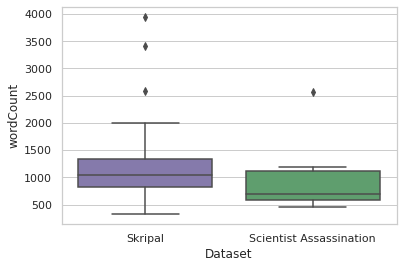

In [13]:
sns.boxplot(x="Dataset", y="wordCount", palette=["m", "g"],
            data=df)

<AxesSubplot:xlabel='Dataset', ylabel='Page'>

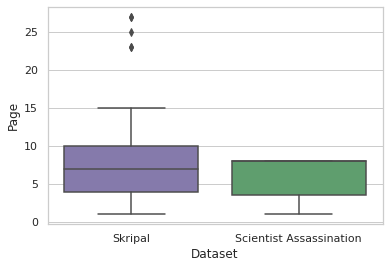

In [14]:
sns.boxplot(x="Dataset", y="Page", palette=["m", "g"],
            data=df)

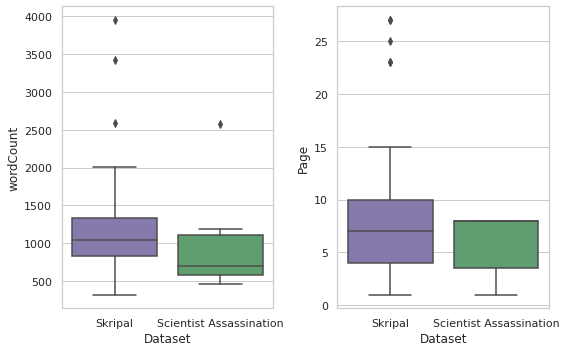

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (8,5))

sns.boxplot(x="Dataset", y="wordCount", palette=["m", "g"],
            data=df, ax = ax[0])
sns.boxplot(x="Dataset", y="Page", palette=["m", "g"],
            data=df, ax = ax[1])

plt.tight_layout()

Text(0, 0.5, 'Word Count')

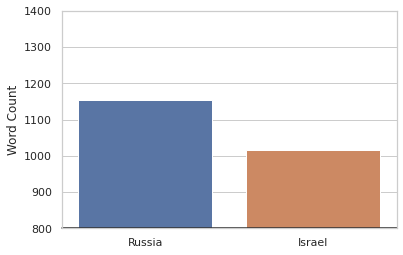

In [16]:
sns.barplot(x=['Russia', 'Israel'], y=[df[df['Dataset'] == "Skripal"]['wordCount'].mean(), df[df['Dataset'] == "Scientist Assassination"]['wordCount'].mean()], palette="deep")
plt.axhline(800, color="k", clip_on=False)
plt.ylim(800,1400)
plt.ylabel("Word Count")

In [17]:
print(df[df['Dataset'] == "Scientist Assassination"]['wordCount'].mean())
print(df[df['Dataset'] == "Skripal"]['wordCount'].mean())

1015.8571428571429
1153.4077669902913


Text(0, 0.5, 'Page')

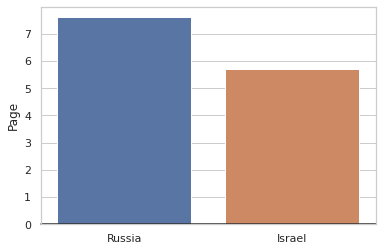

In [18]:
sns.barplot(x=['Russia', 'Israel'], y=[df[df['Dataset'] == "Skripal"]['Page'].mean(), df[df['Dataset'] == "Scientist Assassination"]['Page'].mean()], palette="deep")
plt.axhline(0, color="k", clip_on=False)
plt.ylabel("Page")

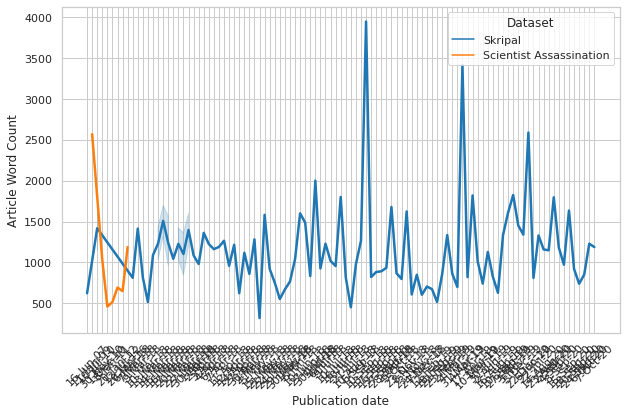

In [19]:
plt.figure(figsize = (10,6))
sns.lineplot(data=df, x = "Publication date", y = "wordCount", hue = "Dataset", palette="tab10", linewidth=2.5)
# plt.xticks(df['PubDateParsed'].dt.year.unique().tolist())
plt.xticks(rotation = 45)
plt.ylabel("Article Word Count")
plt.show()

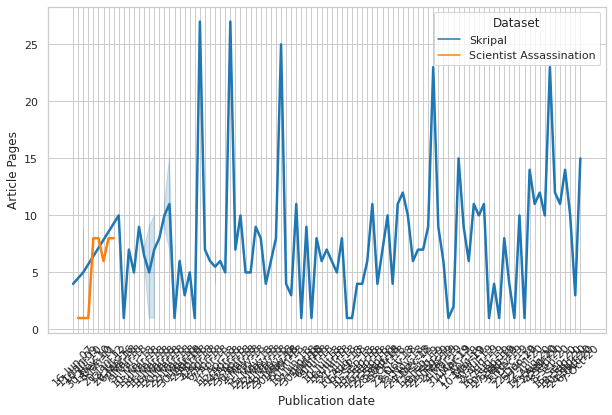

In [20]:
plt.figure(figsize = (10,6))
sns.lineplot(data=df, x = "Publication date", y = "Page", hue = "Dataset", palette="tab10", linewidth=2.5)
# plt.xticks(df['PubDateParsed'].dt.year.unique().tolist())
plt.xticks(rotation = 45)
plt.ylabel("Article Pages")
plt.show()

In [21]:
df.sort_values(by=['Pages'])

,fullText,Dataset,Author,People,Subject,Title,Pages,Publication date,Page,wordCount,PubDateParsed
68,"EDITORS' NOTE APPENDEDLONDON -- Arron Banks, a...",Skripal,"Kirkpatrick, David D; Rosenberg, Matthew","Banks, Arron",Investment bankers;Mines;Diamonds;Investigatio...,Kremlin's Links To Brexit Push Get a New Look:...,A.1,30-Jun-18,1,2002,2018-06-30
20,First came a destabilization campaign in Moldo...,Skripal,"Schwirtz, Michael","Skripal, Sergei V",Photographs;Biological & chemical weapons;Awar...,Secret Spy Unit In Russia Aims To Jolt Europe:...,A.1,9-Oct-19,1,1826,2019-10-09
112,LONDON -- Few world leaders have looked weaker...,Skripal,"Pérez-Peña, Richard; Castle, Stephen","May, Theresa; Putin, Vladimir",Expulsions & suspensions;Diplomatic & consular...,Britain Expels 23 Russians. That's the Easy Pa...,A.1,15-Mar-18,1,1698,2018-03-15
17,"For years, members of a secret team, Unit 2915...",Skripal,"Schwirtz, Michael","Skripal, Sergei V",Men;Poisoning;Investigations;Restaurants;Assas...,'Aha' Moment In Poisonings Led to Russia: [For...,A.1,22-Dec-19,1,2591,2019-12-22
14,Russian efforts to interfere in the British po...,Skripal,"Landler, Mark; Castle, Stephen","Johnson, Boris; Putin, Vladimir",Evidence;Poisoning;Members of Parliament;Law e...,Britain Accused Of Discounting Russian Attacks...,A.1,22-Jul-20,1,1331,2020-07-22
...,...,...,...,...,...,...,...,...,...,...,...
122,"WASHINGTON -- When Aleksandr Zaporozhsky, one ...",Skripal,SCOTT SHANE and ELLEN BARRY,"Zaporozhsky, Aleksandr; Skripal, Sergei V; Vas...",Prisoner transfers;Espionage,Intrigue and Ambiguity in Cases of 4 Russians ...,A.9,10-Jul-10,9,1158,2010-07-10
29,A court in Montenegro on Thursday found 14 peo...,Skripal,"Kramer, Andrew E; Orovic, Joseph","Skripal, Sergei V",Evidence;Passports & visas;Trials;Espionage;In...,"2 Russians, Believed to Be Agents, Are Among 1...",A.9,10-May-19,9,1015,2019-05-10
1,A new AMC show dramatizes the 2018 poisoning o...,Skripal,"Schwirtz, Michael","Skripal, Sergei V; Sturgess, Dawn",Public health;Poisoning;Documentary films;Mili...,Picking Up the Pieces After the Poisonings: [T...,C.3,6-Oct-20,3,1230,2020-10-06
70,Vladimir V. Putin is not a soccer fan -- ice h...,Skripal,"Smith, Rory","Putin, Vladimir",Drugs & sports;Cold War;Local elections;Awards...,Putin's Big Bet: [SpecialSections],F.3,10-Jun-18,3,1487,2018-06-10


# Per Subject Breakdown

In [22]:
# let's use a multilabel binarizer from sklearn
from sklearn.preprocessing import MultiLabelBinarizer

In [23]:
# convert to list
df['Subject'] = df['Subject'].apply(lambda x: x.split(";"))
df['People'] = df['People'].apply(lambda x: x.split(";"))

In [24]:
df.head()

,fullText,Dataset,Author,People,Subject,Title,Pages,Publication date,Page,wordCount,PubDateParsed
124,Russia's intelligence service said Friday that...,Skripal,Steven Lee Myers; Alan Cowell contributed repo...,"[Litvinenko, Alexander, Lugovoy, Andrei K]","[Espionage, Criminal investigations, Poisoning]",Russia Says It Opened Criminal Inquiry Into Br...,A.4,16-Jun-07,4,624,2007-06-16
131,President Bush deflected a secret request by I...,Scientist Assassination,"Sanger, David E","[Bush, George W]","[Covert operations, Nuclear weapons, Military ...",U.S. Rejected Aid For Israeli Raid On Nuclear ...,A.1,11-Jan-09,1,2571,2009-01-11
122,"WASHINGTON -- When Aleksandr Zaporozhsky, one ...",Skripal,SCOTT SHANE and ELLEN BARRY,"[Zaporozhsky, Aleksandr, Skripal, Sergei V, ...","[Prisoner transfers, Espionage]",Intrigue and Ambiguity in Cases of 4 Russians ...,A.9,10-Jul-10,9,1158,2010-07-10
123,WASHINGTON -- On a Friday afternoon in mid-Ju...,Skripal,"PETER BAKER, CHARLIE SAVAGE and BENJAMIN WEISER","[Obama, Barack]","[Arrests, Prisoner transfers, International re...",Swap Idea Emerged Early In Case of Russian Age...,A.1,10-Jul-10,1,1681,2010-07-10
130,TEHRAN -- Unidentified assailants riding motor...,Scientist Assassination,WILLIAM YONG and ROBERT F. WORTH,"[Ahmadinejad, Mahmoud]","[Nuclear weapons, Sanctions, Assassinations & ...",Bombings Hit Atomic Experts In Iran Streets: [...,A.1,30-Nov-10,1,1032,2010-11-30


In [25]:
df['Dataset'].value_counts()

Skripal                    103
Scientist Assassination      7
Name: Dataset, dtype: int64

# Skripal

In [26]:
mlb = MultiLabelBinarizer(sparse_output=True)

df_skripal = df[df['Dataset'] == "Skripal"]
skripal_subjects = df_skripal.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df_skripal.pop('Subject')),
                index=df_skripal.index,
                columns=mlb.classes_))

In [27]:
skripal_subjects.head()

,fullText,Dataset,Author,People,Title,Pages,Publication date,Page,wordCount,PubDateParsed,...,Tournaments & championships,Toxicology,Treaties,Trials,Voter behavior,Voter fraud,Waste management industry,Wealth,Web sites,World War II
124,Russia's intelligence service said Friday that...,Skripal,Steven Lee Myers; Alan Cowell contributed repo...,"[Litvinenko, Alexander, Lugovoy, Andrei K]",Russia Says It Opened Criminal Inquiry Into Br...,A.4,16-Jun-07,4,624,2007-06-16,...,0,0,0,0,0,0,0,0,0,0
122,"WASHINGTON -- When Aleksandr Zaporozhsky, one ...",Skripal,SCOTT SHANE and ELLEN BARRY,"[Zaporozhsky, Aleksandr, Skripal, Sergei V, ...",Intrigue and Ambiguity in Cases of 4 Russians ...,A.9,10-Jul-10,9,1158,2010-07-10,...,0,0,0,0,0,0,0,0,0,0
123,WASHINGTON -- On a Friday afternoon in mid-Ju...,Skripal,"PETER BAKER, CHARLIE SAVAGE and BENJAMIN WEISER","[Obama, Barack]",Swap Idea Emerged Early In Case of Russian Age...,A.1,10-Jul-10,1,1681,2010-07-10,...,0,0,0,0,0,0,0,0,0,0
121,LONDON -- A man identified by local news repor...,Skripal,"Castle, Stephen","[Skripal, Sergei V, Litvinenko, Alexander]",A Russian Who Spied For Britain Falls Ill: [Fo...,A.10,6-Mar-18,10,813,2018-03-06,...,0,0,0,0,0,0,0,0,0,0
120,"SALISBURY, England -- The gentle stroll from Z...",Skripal,"Kingsley, Patrick; Pérez-Peña, Richard","[Johnson, Boris, Skripal, Sergei V, Chapman,...","In Quiet English Town, Echoes of Poisonings Pa...",A.1,7-Mar-18,1,1415,2018-03-07,...,0,0,0,0,0,0,0,0,0,0


In [28]:
counts = []
for subject in mlb.classes_:
    counts.append(skripal_subjects[str(subject)].value_counts()[1])
subjects_counts = pd.DataFrame()
subjects_counts['Subject'] = mlb.classes_
subjects_counts['Count'] = counts
subjects_counts['Dataset'] = ["Skripal"] * len(subjects_counts['Count'])

In [29]:
subjects_counts = subjects_counts.sort_values(by=['Count'], ascending = False)

In [30]:
subjects_counts.head()

,Subject,Count,Dataset
140,Poisoning,56,Skripal
14,Biological & chemical weapons,39,Skripal
57,Espionage,33,Skripal
45,Diplomatic & consular services,28,Skripal
141,Poisons,24,Skripal


Text(0.5, 1.0, 'Skripal (Russian spy)')

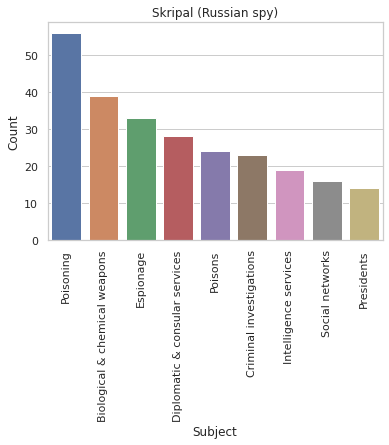

In [31]:
sns.barplot(x="Subject", y="Count", data=subjects_counts.sort_values(by=['Count'], ascending = False).iloc[0:9])
plt.xticks(rotation="vertical")
plt.title("Skripal (Russian spy)")

In [32]:
# word count average per subject
subject_interests = subjects_counts.sort_values(by=['Count'], ascending = False).iloc[0:9]
subject_wordcounts = {}
for i, subject in enumerate(subject_interests['Subject']):
    texts = skripal_subjects[skripal_subjects[str(subject)] == 1]
    subject_wordcounts[i] = [str(subject), texts['wordCount'].mean()]
sub_wordcounts_skripal = pd.DataFrame(subject_wordcounts).T
sub_wordcounts_skripal.columns = ["Subject", "Word Count"]
sub_wordcounts_skripal.head()

,Subject,Word Count
0,Poisoning,1199.25
1,Biological & chemical weapons,1040.62
2,Espionage,1353.88
3,Diplomatic & consular services,1124.04
4,Poisons,1138.42


Text(0, 0.5, 'Average Word Count')

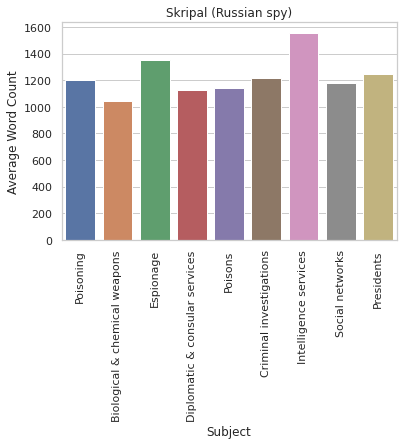

In [33]:
sns.barplot(x="Subject", y="Word Count", data=sub_wordcounts_skripal)
plt.xticks(rotation="vertical")
plt.title("Skripal (Russian spy)")
plt.ylabel("Average Word Count")

## Composite

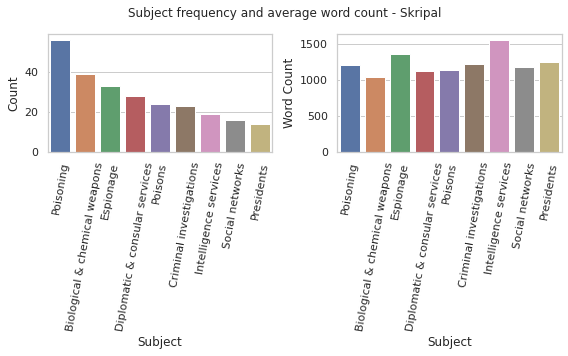

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (8,5))

sns.barplot(x="Subject", y="Count", data=subjects_counts.sort_values(by=['Count'], ascending = False).iloc[0:9], ax = ax[0])
ax[0].tick_params(axis='x', rotation=80)
sns.barplot(x="Subject", y="Word Count", data=sub_wordcounts_skripal, ax = ax[1])
ax[1].tick_params(axis='x', rotation=80)

plt.suptitle("Subject frequency and average word count - Skripal")

plt.tight_layout()

# Scientist Assassination

In [35]:
mlb = MultiLabelBinarizer(sparse_output=True)

df_scientist = df[df['Dataset'] == "Scientist Assassination"]
scientist_subjects = df_scientist.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df_scientist.pop('Subject')),
                index=df_scientist.index,
                columns=mlb.classes_))

In [36]:
scientist_subjects.head()

,fullText,Dataset,Author,People,Title,Pages,Publication date,Page,wordCount,PubDateParsed,...,Espionage,Foreign policy,International relations,International relations-US,Meetings,Military air strikes,Nuclear weapons,Sabotage,Sanctions,Scientists
131,President Bush deflected a secret request by I...,Scientist Assassination,"Sanger, David E","[Bush, George W]",U.S. Rejected Aid For Israeli Raid On Nuclear ...,A.1,11-Jan-09,1,2571,2009-01-11,...,0,0,0,0,0,1,1,1,0,0
130,TEHRAN -- Unidentified assailants riding motor...,Scientist Assassination,WILLIAM YONG and ROBERT F. WORTH,"[Ahmadinejad, Mahmoud]",Bombings Hit Atomic Experts In Iran Streets: [...,A.1,30-Nov-10,1,1032,2010-11-30,...,0,0,0,0,0,0,1,0,1,1
129,TEHRAN -- Iran and the European Union agreed T...,Scientist Assassination,WILLIAM YONG and J. DAVID GOODMAN,"[Ahmadinejad, Mahmoud, Jalili, Saeed]",WORLD BRIEFING MIDDLE EAST; Iran: Date Set for...,A.8,1-Dec-10,8,460,2010-12-01,...,0,0,1,0,1,0,0,0,0,0
128,JERUSALEM -- Israel's departing intelligence c...,Scientist Assassination,"Kershner, Isabel","[Dagan, Meir]",Israeli Ex-Spy Predicts Delay For Iran's Nucle...,A.8,8-Jan-11,8,516,2011-01-08,...,0,0,1,0,0,0,1,0,0,0
127,"JERUSALEM -- Gen. Martin E. Dempsey, chairman ...",Scientist Assassination,"Bronner, Ethan","[Dempsey, Martin E]",U.S. General Visits Israel For Discussions on ...,A.6,20-Jan-12,6,693,2012-01-20,...,0,0,0,1,0,0,1,0,1,0


In [37]:
counts = []
for subject in mlb.classes_:
    counts.append(scientist_subjects[str(subject)].value_counts()[1])
subjects_counts = pd.DataFrame()
subjects_counts['Subject'] = mlb.classes_
subjects_counts['Count'] = counts
subjects_counts['Dataset'] = ["Skripal"] * len(subjects_counts['Count'])

In [38]:
subjects_counts = subjects_counts.sort_values(by=['Count'], ascending = False)

In [39]:
subjects_counts.head()

,Subject,Count,Dataset
12,Nuclear weapons,6,Skripal
8,International relations,3,Skripal
14,Sanctions,3,Skripal
1,Assassinations & assassination attempts,2,Skripal
5,Diplomacy,2,Skripal


Text(0.5, 1.0, 'Scientist Assassination (Israel vs. Iran)')

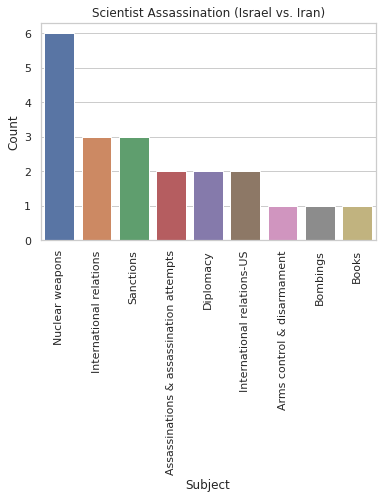

In [40]:
sns.barplot(x="Subject", y="Count", data=subjects_counts.sort_values(by=['Count'], ascending = False).iloc[0:9])
plt.xticks(rotation="vertical")
plt.title("Scientist Assassination (Israel vs. Iran)")

In [41]:
# word count average per subject
subject_interests = subjects_counts.sort_values(by=['Count'], ascending = False).iloc[0:9]
subject_wordcounts = {}
for i, subject in enumerate(subject_interests['Subject']):
    texts = scientist_subjects[scientist_subjects[str(subject)] == 1]
    subject_wordcounts[i] = [str(subject), texts['wordCount'].mean()]
sub_wordcounts_scientist = pd.DataFrame(subject_wordcounts).T
sub_wordcounts_scientist.columns = ["Subject", "Word Count"]
sub_wordcounts_scientist.head()

,Subject,Word Count
0,Nuclear weapons,1108.5
1,International relations,542
2,Sanctions,971.333
3,Assassinations & assassination attempts,841
4,Diplomacy,941


Text(0, 0.5, 'Average Word Count')

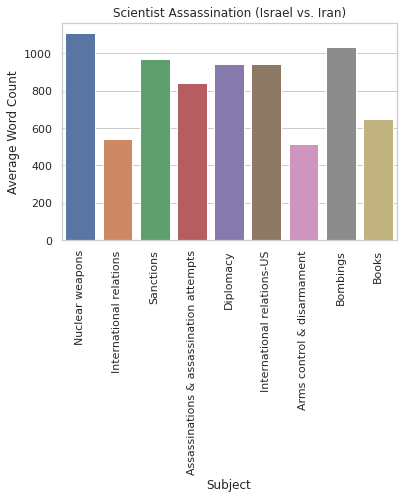

In [42]:
sns.barplot(x="Subject", y="Word Count", data=sub_wordcounts_scientist)
plt.xticks(rotation="vertical")
plt.title("Scientist Assassination (Israel vs. Iran)")
plt.ylabel("Average Word Count")

## Composite

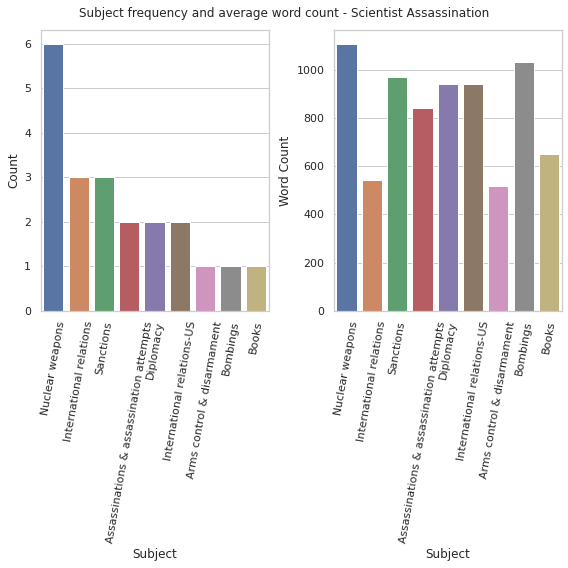

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (8,8))

sns.barplot(x="Subject", y="Count", data=subjects_counts.sort_values(by=['Count'], ascending = False).iloc[0:9], ax = ax[0])
ax[0].tick_params(axis='x', rotation=80)
sns.barplot(x="Subject", y="Word Count", data=sub_wordcounts_scientist, ax = ax[1])
ax[1].tick_params(axis='x', rotation=80)

plt.suptitle("Subject frequency and average word count - Scientist Assassination")

plt.tight_layout()

# By People referred to in Article (People column)

## Skripal

In [44]:
mlb = MultiLabelBinarizer(sparse_output=True)

df_skripal = df[df['Dataset'] == "Skripal"]
skripal_people = df_skripal.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df_skripal.pop('People')),
                index=df_skripal.index,
                columns=mlb.classes_))

In [45]:
skripal_people.head()

,fullText,Dataset,Author,Subject,Title,Pages,Publication date,Page,wordCount,PubDateParsed,...,"Skripal, Sergei V","Sobchak, Ksenia A","Starmer, Keir","Sturgess, Dawn","Trump, Donald J","Tusk, Donald","Wallace, Ben","Williamson, Gavin","Yeltsin, Boris","Zaporozhsky, Aleksandr"
124,Russia's intelligence service said Friday that...,Skripal,Steven Lee Myers; Alan Cowell contributed repo...,"[Espionage, Criminal investigations, Poisoning]",Russia Says It Opened Criminal Inquiry Into Br...,A.4,16-Jun-07,4,624,2007-06-16,...,0,0,0,0,0,0,0,0,0,0
122,"WASHINGTON -- When Aleksandr Zaporozhsky, one ...",Skripal,SCOTT SHANE and ELLEN BARRY,"[Prisoner transfers, Espionage]",Intrigue and Ambiguity in Cases of 4 Russians ...,A.9,10-Jul-10,9,1158,2010-07-10,...,0,0,0,0,0,0,0,0,0,1
123,WASHINGTON -- On a Friday afternoon in mid-Ju...,Skripal,"PETER BAKER, CHARLIE SAVAGE and BENJAMIN WEISER","[Arrests, Prisoner transfers, International re...",Swap Idea Emerged Early In Case of Russian Age...,A.1,10-Jul-10,1,1681,2010-07-10,...,0,0,0,0,0,0,0,0,0,0
121,LONDON -- A man identified by local news repor...,Skripal,"Castle, Stephen","[Poisoning, Convictions, Criminal investigatio...",A Russian Who Spied For Britain Falls Ill: [Fo...,A.10,6-Mar-18,10,813,2018-03-06,...,1,0,0,0,0,0,0,0,0,0
120,"SALISBURY, England -- The gentle stroll from Z...",Skripal,"Kingsley, Patrick; Pérez-Peña, Richard","[Cold War, Poisoning, Law enforcement, Counter...","In Quiet English Town, Echoes of Poisonings Pa...",A.1,7-Mar-18,1,1415,2018-03-07,...,0,0,0,0,0,0,0,0,0,0


In [46]:
counts = []
for people in mlb.classes_:
    counts.append(skripal_people[str(people)].value_counts()[1])
subjects_counts = pd.DataFrame()
subjects_counts['Subject'] = mlb.classes_
subjects_counts['Count'] = counts
subjects_counts['Dataset'] = ["Skripal"] * len(subjects_counts['Count'])

In [47]:
subjects_counts = subjects_counts.sort_values(by=['Count'], ascending = False)

In [48]:
subjects_counts.head()

,Subject,Count,Dataset
44,"Putin, Vladimir",49,Skripal
49,"Skripal, Sergei V",41,Skripal
91,"Skripal, Sergei V",33,Skripal
32,"May, Theresa",22,Skripal
95,"Trump, Donald J",17,Skripal


Text(0.5, 1.0, 'Skripal (Russian spy)')

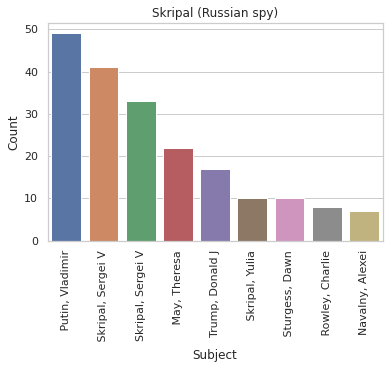

In [49]:
sns.barplot(x="Subject", y="Count", data=subjects_counts.sort_values(by=['Count'], ascending = False).iloc[0:9])
plt.xticks(rotation="vertical")
plt.title("Skripal (Russian spy)")

## Scientist Assassination

In [50]:
mlb = MultiLabelBinarizer(sparse_output=True)

df_scientist = df[df['Dataset'] == "Scientist Assassination"]
scientist_people = df_scientist.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df_scientist.pop('People')),
                index=df_scientist.index,
                columns=mlb.classes_))

In [51]:
scientist_people.head()

,fullText,Dataset,Author,Subject,Title,Pages,Publication date,Page,wordCount,PubDateParsed,"Jalili, Saeed","Kerry, John F","Obama, Barack","Raviv, Dan","Ahmadinejad, Mahmoud","Bush, George W","Dagan, Meir","Dempsey, Martin E","Melman, Yossi"
131,President Bush deflected a secret request by I...,Scientist Assassination,"Sanger, David E","[Covert operations, Nuclear weapons, Military ...",U.S. Rejected Aid For Israeli Raid On Nuclear ...,A.1,11-Jan-09,1,2571,2009-01-11,0,0,0,0,0,1,0,0,0
130,TEHRAN -- Unidentified assailants riding motor...,Scientist Assassination,WILLIAM YONG and ROBERT F. WORTH,"[Nuclear weapons, Sanctions, Assassinations & ...",Bombings Hit Atomic Experts In Iran Streets: [...,A.1,30-Nov-10,1,1032,2010-11-30,0,0,0,0,1,0,0,0,0
129,TEHRAN -- Iran and the European Union agreed T...,Scientist Assassination,WILLIAM YONG and J. DAVID GOODMAN,"[Meetings, International relations]",WORLD BRIEFING MIDDLE EAST; Iran: Date Set for...,A.8,1-Dec-10,8,460,2010-12-01,1,0,0,0,1,0,0,0,0
128,JERUSALEM -- Israel's departing intelligence c...,Scientist Assassination,"Kershner, Isabel","[Nuclear weapons, Arms control & disarmament, ...",Israeli Ex-Spy Predicts Delay For Iran's Nucle...,A.8,8-Jan-11,8,516,2011-01-08,0,0,0,0,0,0,1,0,0
127,"JERUSALEM -- Gen. Martin E. Dempsey, chairman ...",Scientist Assassination,"Bronner, Ethan","[Nuclear weapons, Sanctions, International rel...",U.S. General Visits Israel For Discussions on ...,A.6,20-Jan-12,6,693,2012-01-20,0,0,0,0,0,0,0,1,0


In [52]:
counts = []
for people in mlb.classes_:
    print(people)
    counts.append(scientist_people[str(people)].value_counts()[1])
subjects_counts = pd.DataFrame()
subjects_counts['Subject'] = mlb.classes_
subjects_counts['Count'] = counts
subjects_counts['Dataset'] = ["Skripal"] * len(subjects_counts['Count'])

 Jalili, Saeed
 Kerry, John F
 Obama, Barack
 Raviv, Dan
Ahmadinejad, Mahmoud
Bush, George W
Dagan, Meir
Dempsey, Martin E
Melman, Yossi


In [53]:
subjects_counts = subjects_counts.sort_values(by=['Count'], ascending = False)

In [54]:
subjects_counts.head()

,Subject,Count,Dataset
4,"Ahmadinejad, Mahmoud",2,Skripal
5,"Bush, George W",2,Skripal
0,"Jalili, Saeed",1,Skripal
1,"Kerry, John F",1,Skripal
2,"Obama, Barack",1,Skripal


Text(0.5, 1.0, 'Scientist Assassination (Israel vs. Iran)')

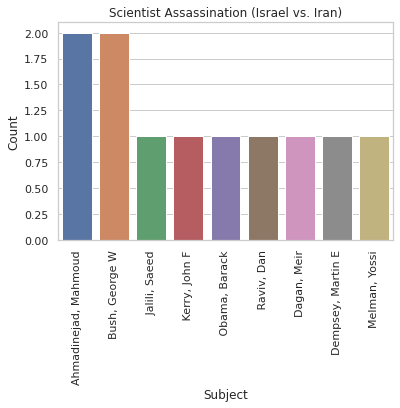

In [55]:
sns.barplot(x="Subject", y="Count", data=subjects_counts.sort_values(by=['Count'], ascending = False).iloc[0:9])
plt.xticks(rotation="vertical")
plt.title("Scientist Assassination (Israel vs. Iran)")